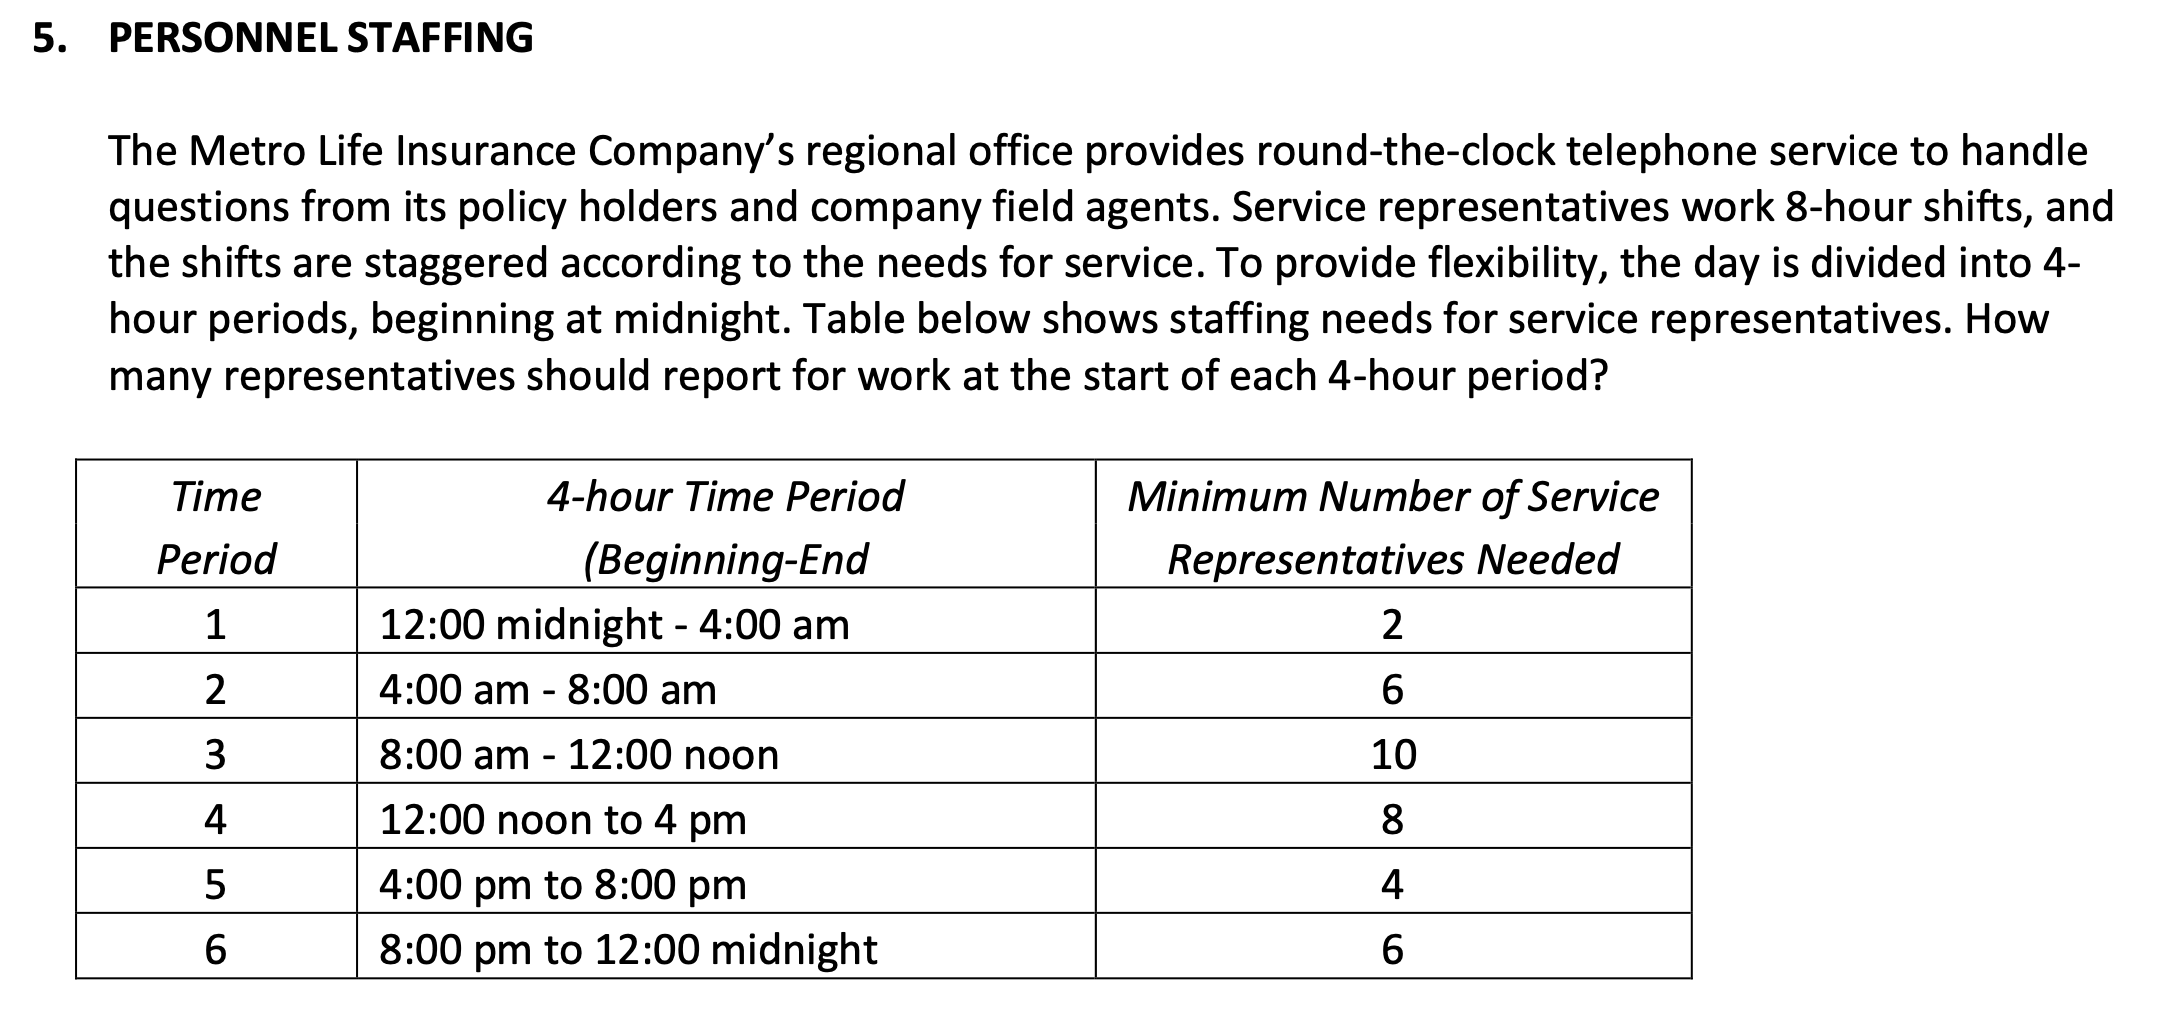

In [2]:
from pulp import *
import pandas as pd

In [3]:
df = pd.DataFrame({'Time Period': [1, 2, 3, 4, 5, 6],
                   '4-hour Time Period': ['0000-0400', '0400-0800','0800-1200','1200-1600','1600-2000','2000-0000'],
                   'Min Number of Service Reps Needed': [2,6,10,8,4,6]
                    })

print(df)

   Time Period 4-hour Time Period  Min Number of Service Reps Needed
0            1          0000-0400                                  2
1            2          0400-0800                                  6
2            3          0800-1200                                 10
3            4          1200-1600                                  8
4            5          1600-2000                                  4
5            6          2000-0000                                  6


In [4]:
# Initialize the LP
model = LpProblem('Personnel Staffing', LpMinimize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3, 4, 5, 6], lowBound=0, cat='Integer') # Shifts 1,2,3,4,5,6

# Objective Function
model += x[1] + x[2] + x[3] + x[4] + x[5] + x[6] # Minimum Workers

# Add Constraints
model += x[6] + x[1] >= 2, "0000-0400"
model += x[1] + x[2] >= 6, "0400-0800"
model += x[2] + x[3] >= 10, "0800-1200"
model += x[3] + x[4] >= 8, "1200-1600"
model += x[4] + x[5] >= 4, "1600-2000"
model += x[5] + x[6] >= 6, "2000-0000"

print(model)

# Solve the modellem
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
min_employees = value(model.objective)
print(f"min employees = {min_employees}")

Personnel_Staffing:
MINIMIZE
1*x_1 + 1*x_2 + 1*x_3 + 1*x_4 + 1*x_5 + 1*x_6 + 0
SUBJECT TO
0000_0400: x_1 + x_6 >= 2

0400_0800: x_1 + x_2 >= 6

0800_1200: x_2 + x_3 >= 10

1200_1600: x_3 + x_4 >= 8

1600_2000: x_4 + x_5 >= 4

2000_0000: x_5 + x_6 >= 6

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer
0 <= x_6 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/9e14a5ac186e419e80ac84080e059c37-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/9e14a5ac186e419e80ac84080e059c37-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 42 RHS
At line 49 BOUNDS
At line 56 ENDATA
Problem MODEL has 6 rows, 6 columns and 12 elemen

/Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [5]:
"""x_1 = 0.0
x_2 = 6.0
x_3 = 4.0
x_4 = 4.0
x_5 = 4.0
x_6 = 2.0
min employees = 20.0"""

'x_1 = 0.0\nx_2 = 6.0\nx_3 = 4.0\nx_4 = 4.0\nx_5 = 4.0\nx_6 = 2.0\nmin employees = 20.0'